## Memory Experiment

The following dataset contain 5 different repetions of the same experiment.

In [1]:
import numpy as np
import pandas as pd

from PyEyeSim import EyeData

In [2]:
Path = 'C:\\Users\\nickp\\Documents\\Courses\\P1\\EyeMovementDat\\'
FilePath='C:\\Users\\nickp\\Documents\\Courses\\P1\\EyeMovementDat\\MemoryStudyFix.csv'

FixData=pd.read_csv(FilePath)
print(np.shape(FixData))

(41139, 8)


In [3]:
FixData

,Unnamed: 0,subjectID,Stimulus,Category,Repetition,mean_x,mean_y,length
0,0,1,5,7,1,427.388886,553.743713,270
1,1,1,5,7,1,782.835693,379.505615,286
2,2,1,5,7,1,701.805664,303.241455,280
3,3,1,5,7,1,864.697998,416.245056,382
4,4,1,5,7,1,382.930786,622.229553,312
...,...,...,...,...,...,...,...,...
41134,10,45,46,7,5,800.319580,385.262878,286
41135,11,45,46,7,5,1080.494507,296.249237,394
41136,12,45,46,7,5,987.145996,365.118561,226
41137,13,45,46,7,5,699.699402,381.714996,346


In [4]:
MemData=FixData
#Filter for only the first two repetition (Repetition 1 and 2)
MemData1=FixData[(FixData['Repetition']==1) | (FixData['Repetition']==2)]

In [5]:
sizeX,sizeY=1280,960
MemData=EyeData('Memory','Within',MemData,sizeX,sizeY)
MemData.DataInfo(FixDuration='length',Stimulus='filenumber',subjectID='SUBJECTINDEX',StimPath=Path+'7/',StimExt='.png')
MemData.RunDescriptiveFix()

dataset size:  (41139, 8)
study design:  Within
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
column found:  Stimulus  default:  Stimulus
column found:  subjectID  default:  subjectID
column found:  mean_x  default:  mean_x
column found:  mean_y  default:  mean_y
info found for 45 subjects, and 12 stimuli
stimuli loaded succesfully, access as self.images
run descriptive analysis
Data for  45 observers and  12  stimuli.
Mean fixation number:  76.18  +/-  11.77
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  540
Mean X location:  654.7  +/-  28.3  pixels
Mean Y location:  462.5  +/-  33.6  pixels
Mean saccade  amplitude:  254.7  +/-  41.2  pixels
Mean scanpath  length:  19185.5  +/-  4521.8  pixels
Data for  45 observers and  12  stimuli.
Mean fixation number:  76.18  +/-  11.77
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  540
Mean X location:  654.7  +/-

(array([ 5, 17, 19, 20, 22, 27, 28, 29, 30, 43, 45, 46], dtype=int64),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64))

In [6]:
sizeX,sizeY=1280,960
MemData1=EyeData('Memory','Within',MemData1,sizeX,sizeY)
MemData1.DataInfo(FixDuration='length',Stimulus='filenumber',subjectID='SUBJECTINDEX',StimPath=Path+'7/',StimExt='.png')
MemData1.RunDescriptiveFix()

dataset size:  (17107, 8)
study design:  Within
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
column found:  Stimulus  default:  Stimulus
column found:  subjectID  default:  subjectID
column found:  mean_x  default:  mean_x
column found:  mean_y  default:  mean_y
info found for 45 subjects, and 12 stimuli
stimuli loaded succesfully, access as self.images
run descriptive analysis
Data for  45 observers and  12  stimuli.
Mean fixation number:  31.68  +/-  4.67
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  540
Mean X location:  653.6  +/-  33.1  pixels
Mean Y location:  457.9  +/-  31.5  pixels
Mean saccade  amplitude:  257.1  +/-  35.8  pixels
Mean scanpath  length:  7865.8  +/-  1577.2  pixels
Data for  45 observers and  12  stimuli.
Mean fixation number:  31.68  +/-  4.67
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  540
Mean X location:  653.6  +/-  3

(array([ 5, 17, 19, 20, 22, 27, 28, 29, 30, 43, 45, 46], dtype=int64),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64))

In [7]:
components = list(range(2, 16))
components

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

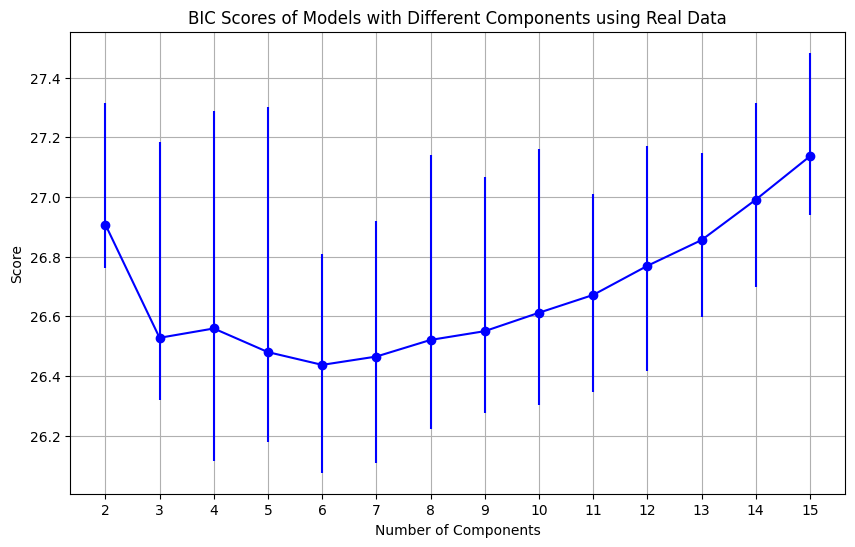

In [18]:
results_1 = MemData1.GaussianHMMPipeline(5, components, starting_tests=100, only_starting=True, only_bic=True)

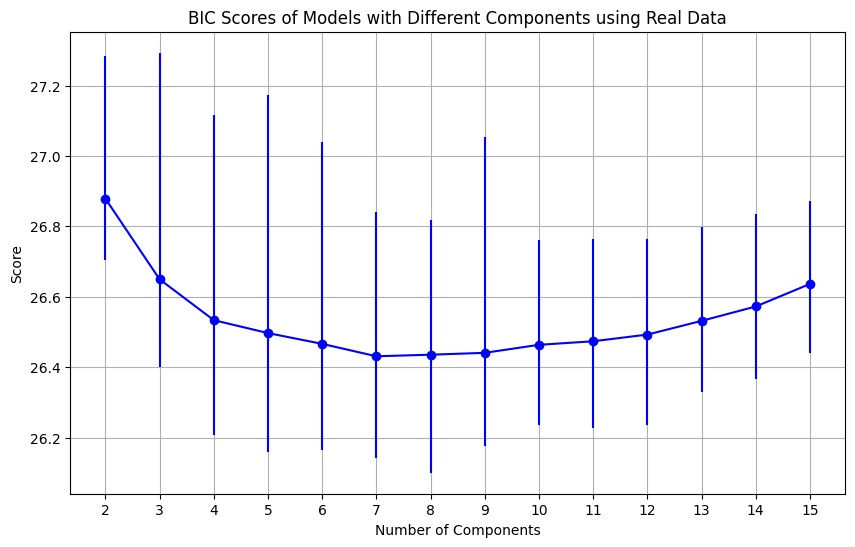

resolution x = 1280  y = 960
   Stimulus Best Model (Min BIC) Best Model (Mean + Standard Deviation)  \
0         5      [8, 7, 5, 6, 9]                     [10, 12, 7, 8, 13]   

    Entropy  
0  5.152962  


In [19]:
results_full = MemData.GaussianHMMPipeline(5, components, starting_tests=200, only_starting=True, only_bic=True, only_best=True, threshold=0.4)

We can see that the componets resuting from the stargin test are different, we proceed to analyze both the best models

In [20]:
components = [model.n_components for model in results_full[0]]
print(components)

[7, 8, 10, 12, 13]


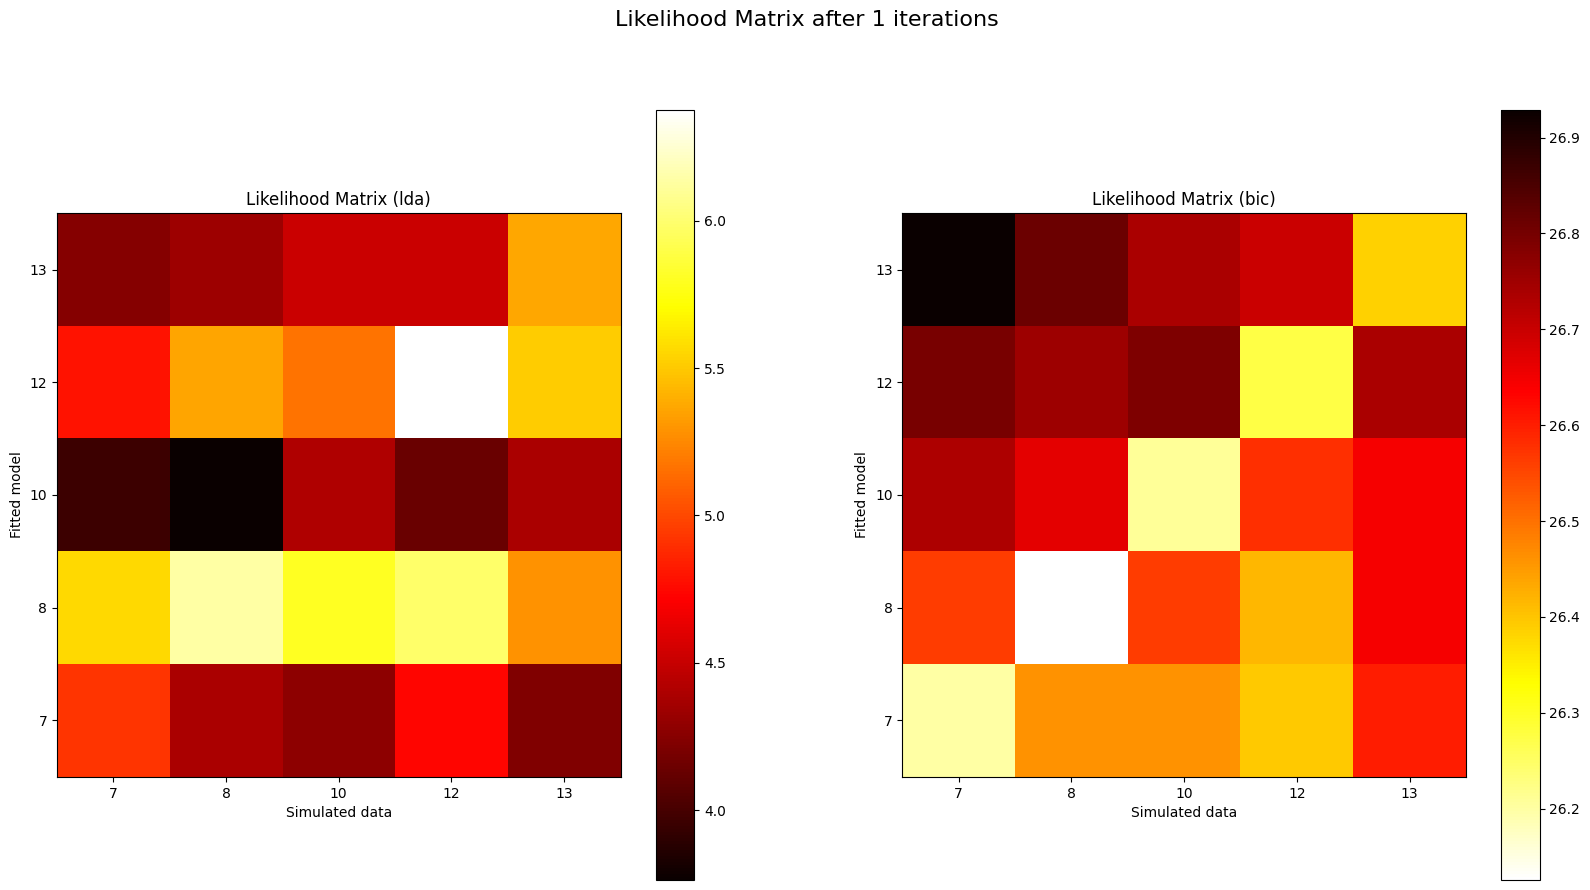

resolution x = 1280  y = 960


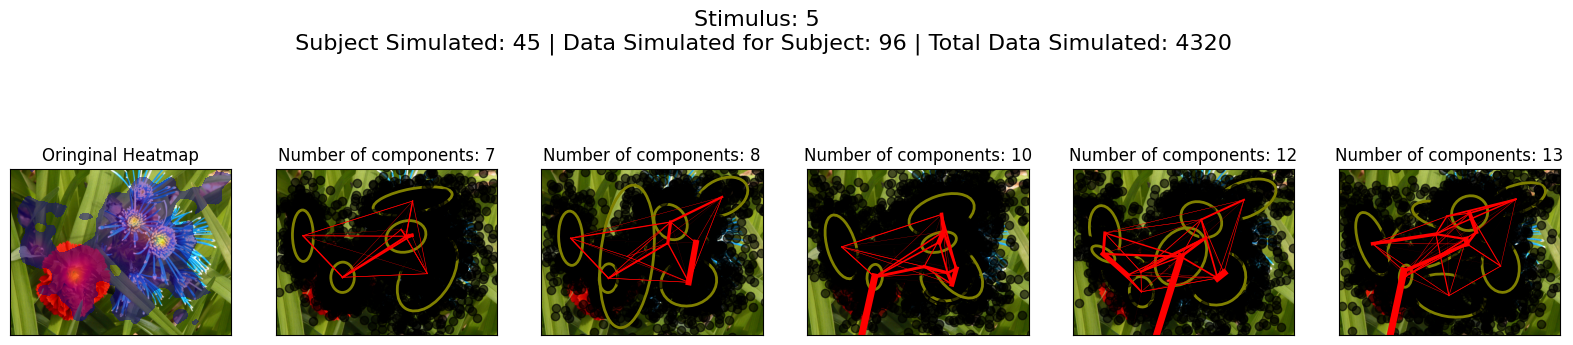

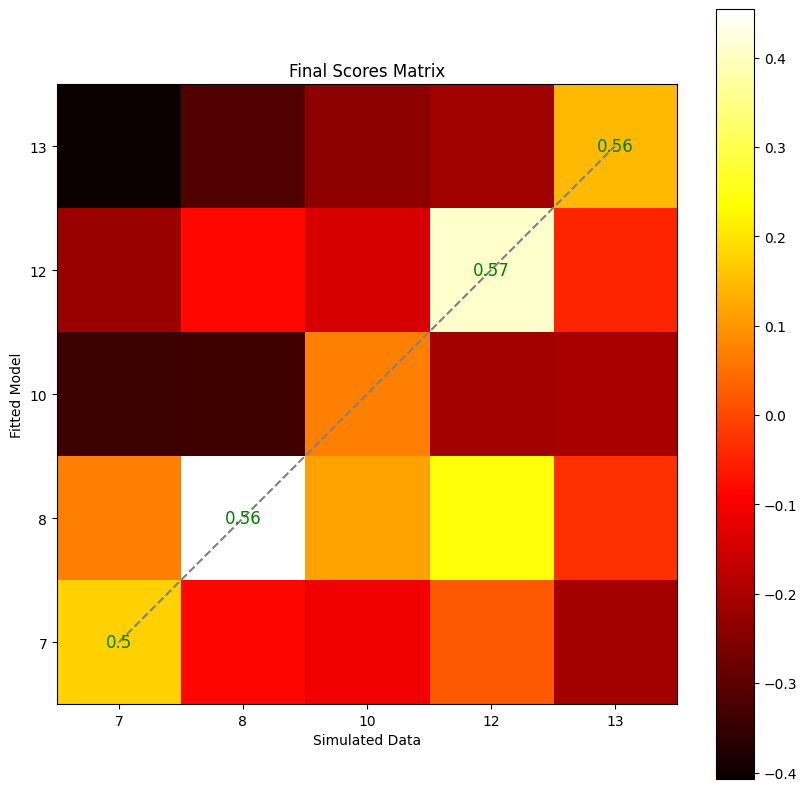

In [21]:
model_list = results_full[0]
MemData.GaussianHMMPipeline(5, components, simulation_type='max', evaluation=['lda','bic'], n_iter=100, iteration=1, only_bic=True, models=model_list, Summary=False)

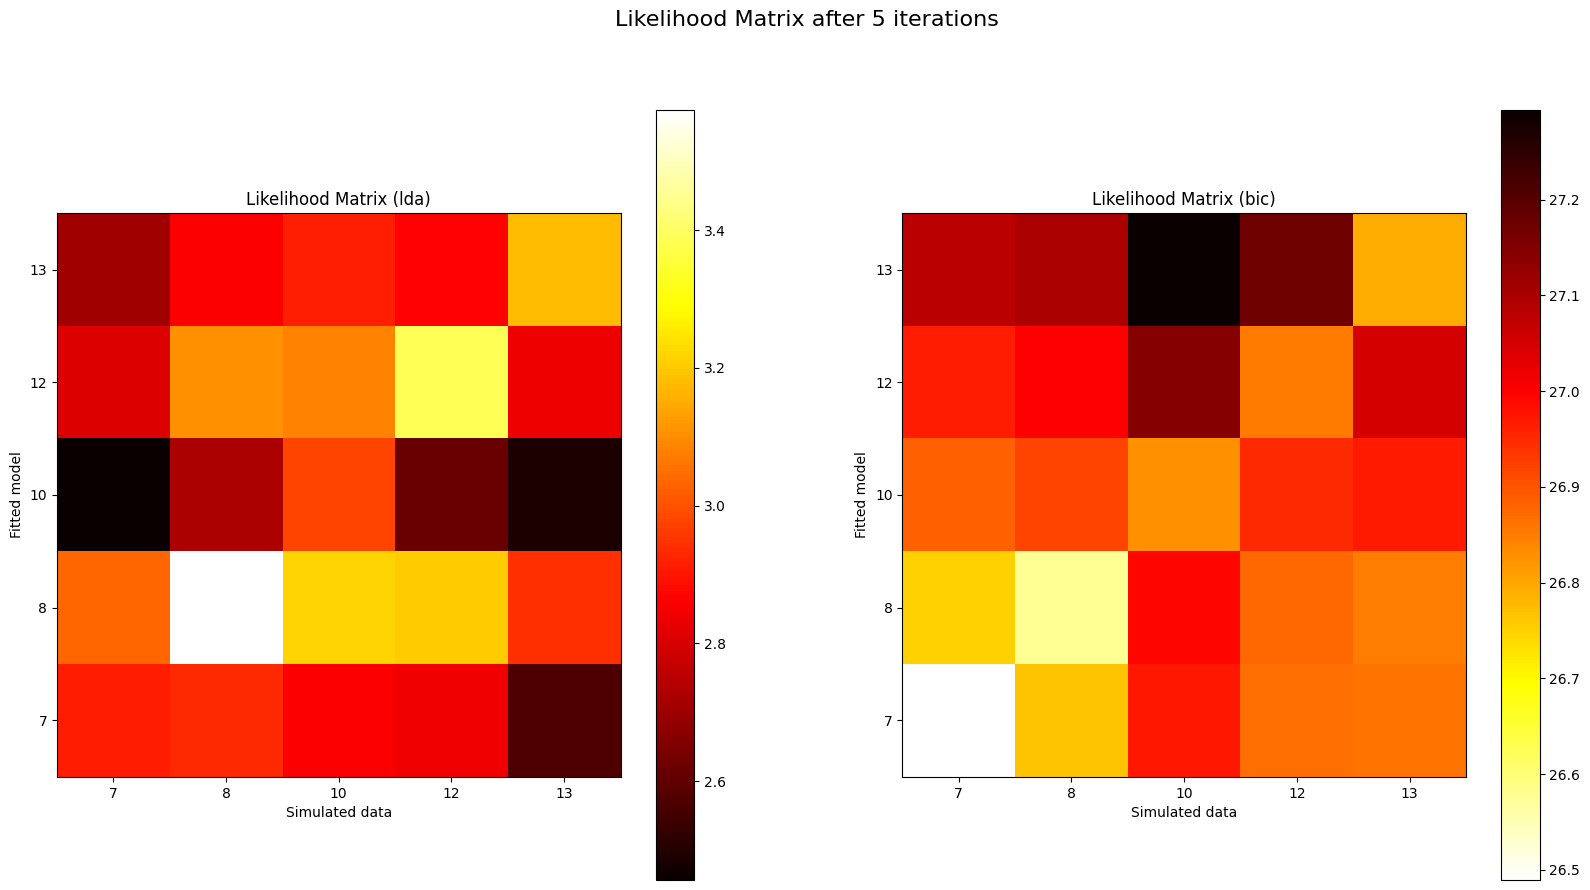

resolution x = 1280  y = 960


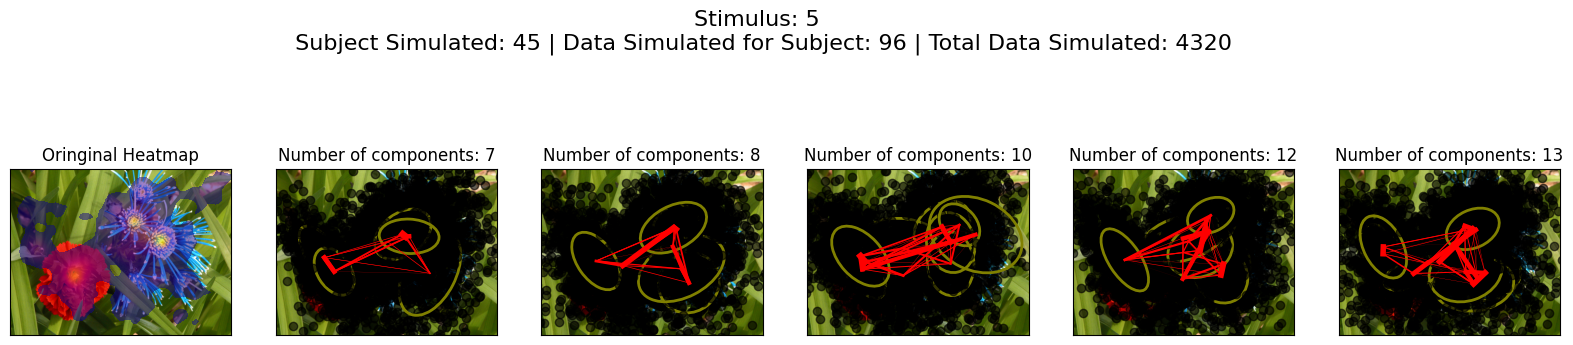

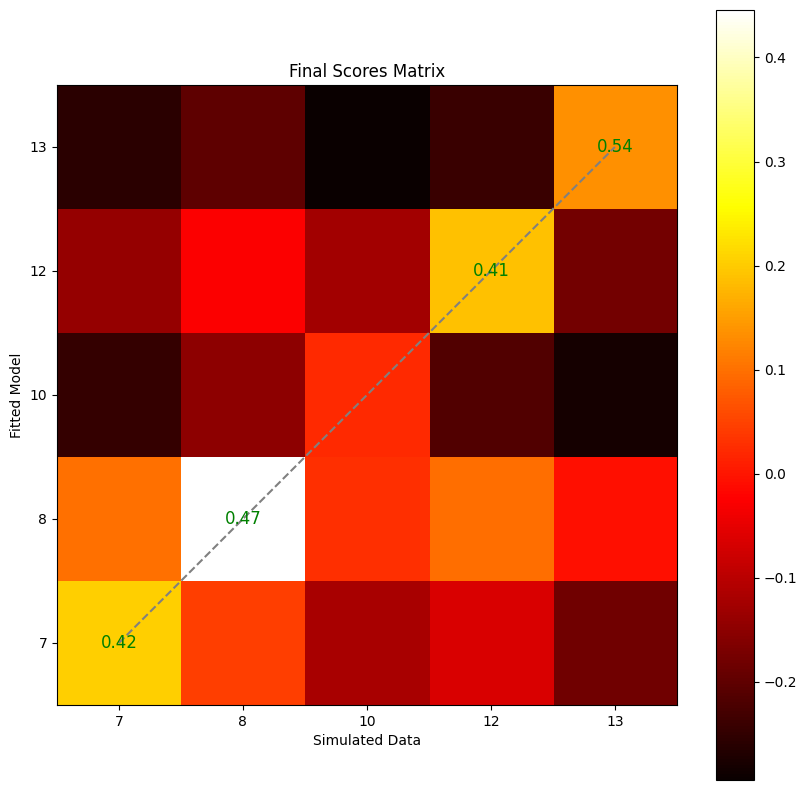

In [22]:
model_list = results_full[0]
MemData.GaussianHMMPipeline(5, components, simulation_type='max', evaluation=['lda','bic'], n_iter=1000, iteration=5, only_bic=True, models=model_list, Summary=False)

Now we make a test using only the first two repetitions, we want to investigate if simulating the same amount of data of the full datasat, we can get similar results.

In [23]:
model_list = []
for model in results_1[0]:
    if model.n_components in components:
        model_list.append(model)

print(model_list)

[GaussianHMM(covariance_type='full', n_components=7), GaussianHMM(covariance_type='full', n_components=8), GaussianHMM(covariance_type='full', n_components=10), GaussianHMM(covariance_type='full', n_components=12), GaussianHMM(covariance_type='full', n_components=13)]


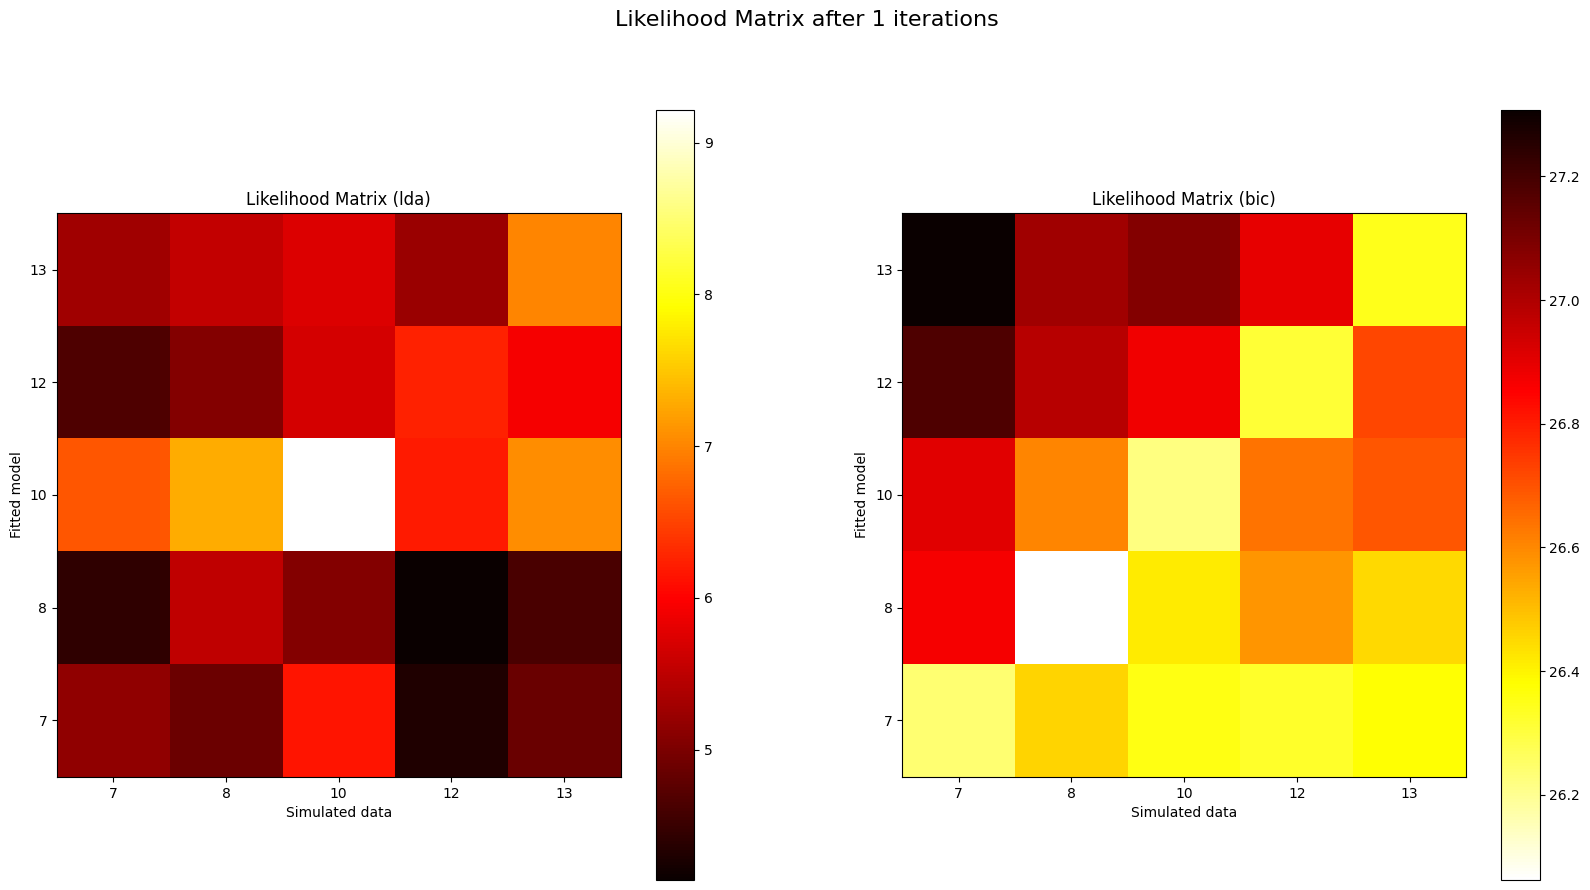

resolution x = 1280  y = 960


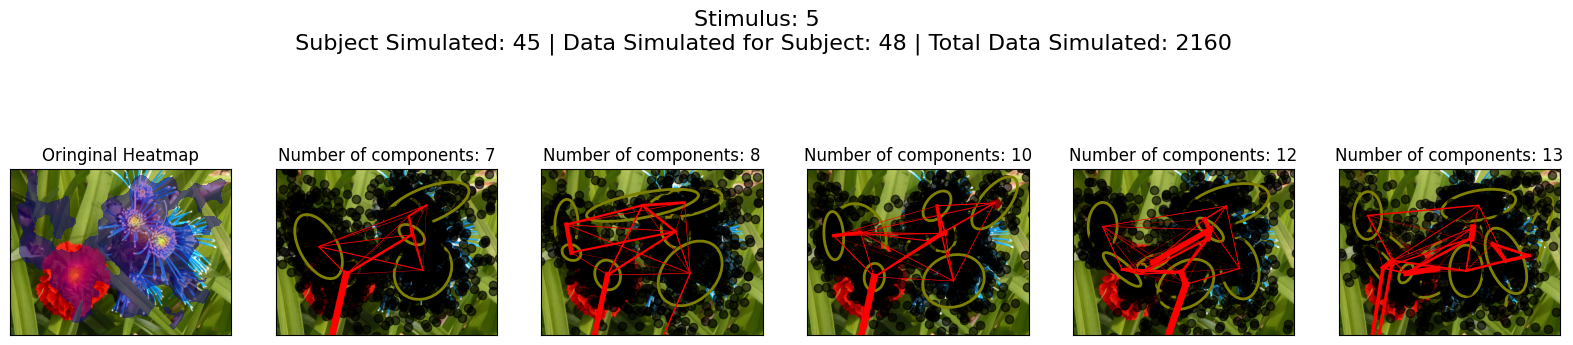

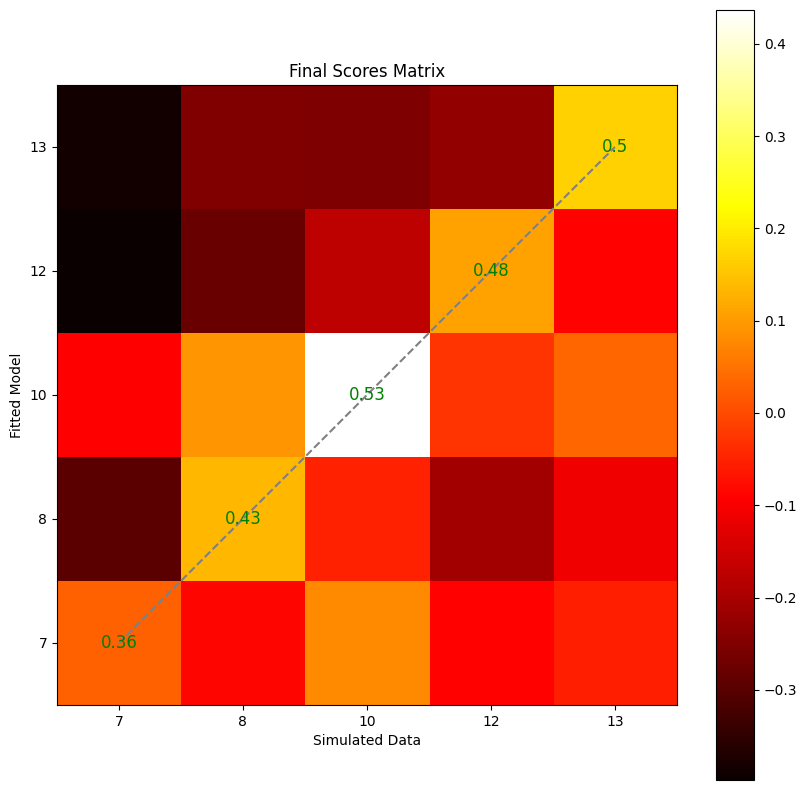

In [24]:
MemData1.GaussianHMMPipeline(5, components, simulation_type='max', evaluation=['lda','bic'], n_iter=100, iteration=1, only_bic=True, models=model_list, Summary=False)

In [25]:
model_list = []
for model in results_1[0]:
    if model.n_components in components:
        model_list.append(model)

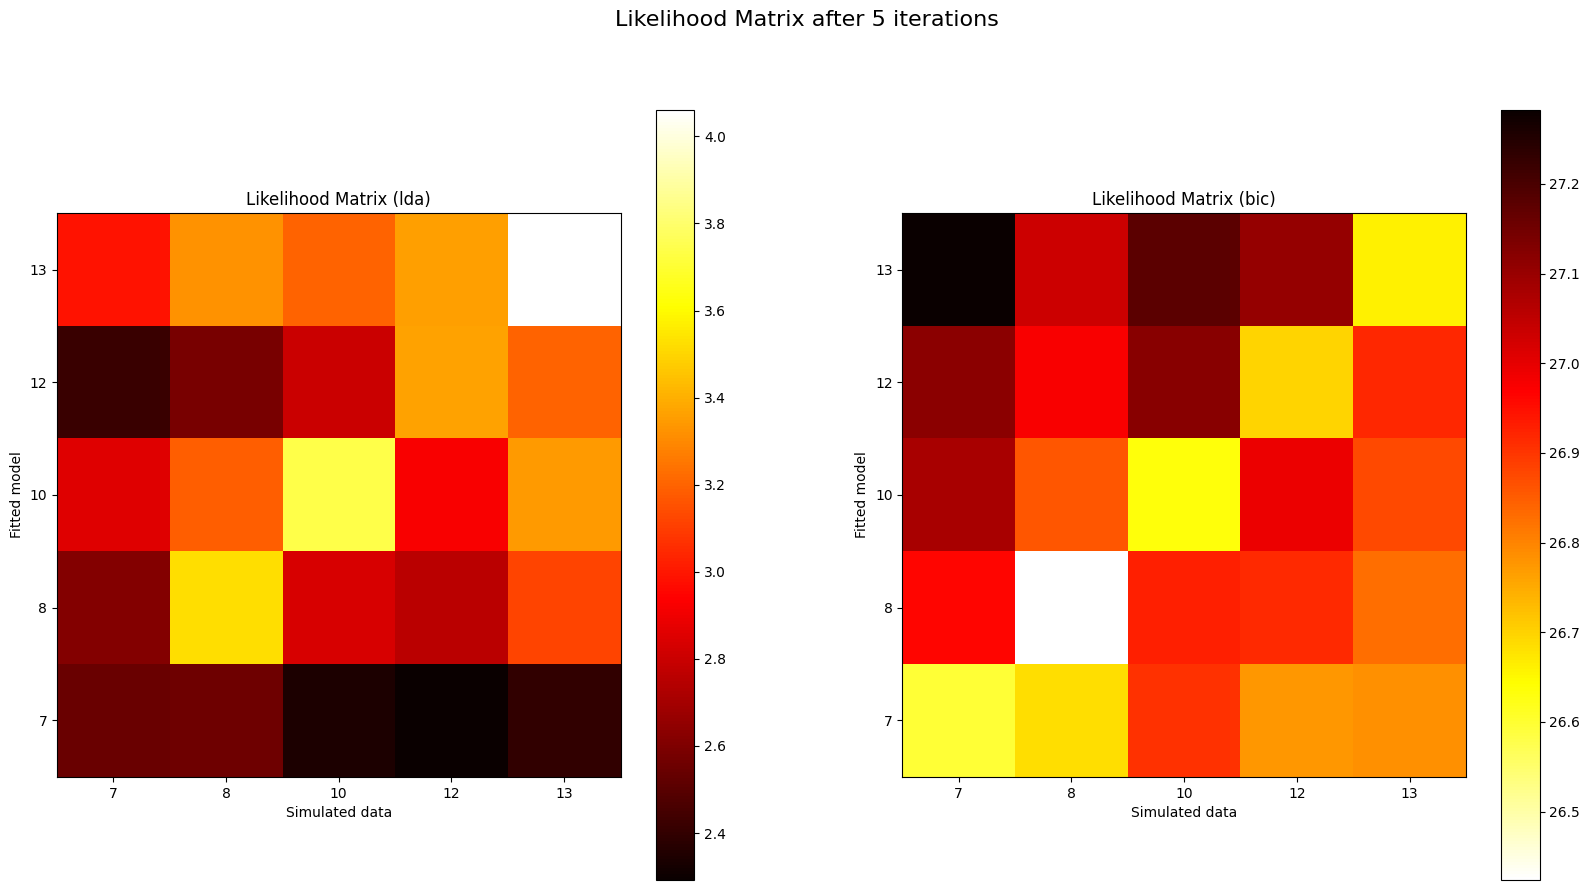

resolution x = 1280  y = 960


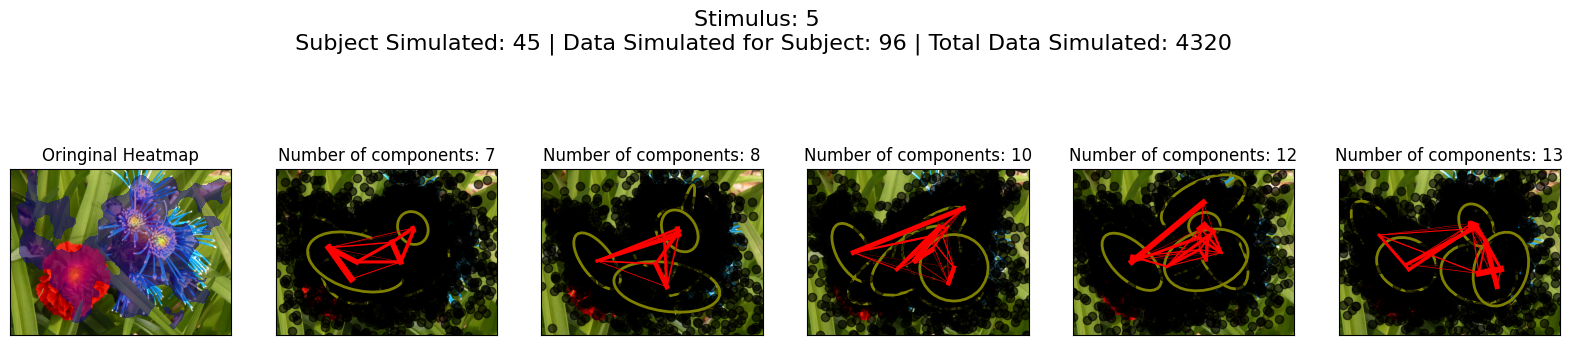

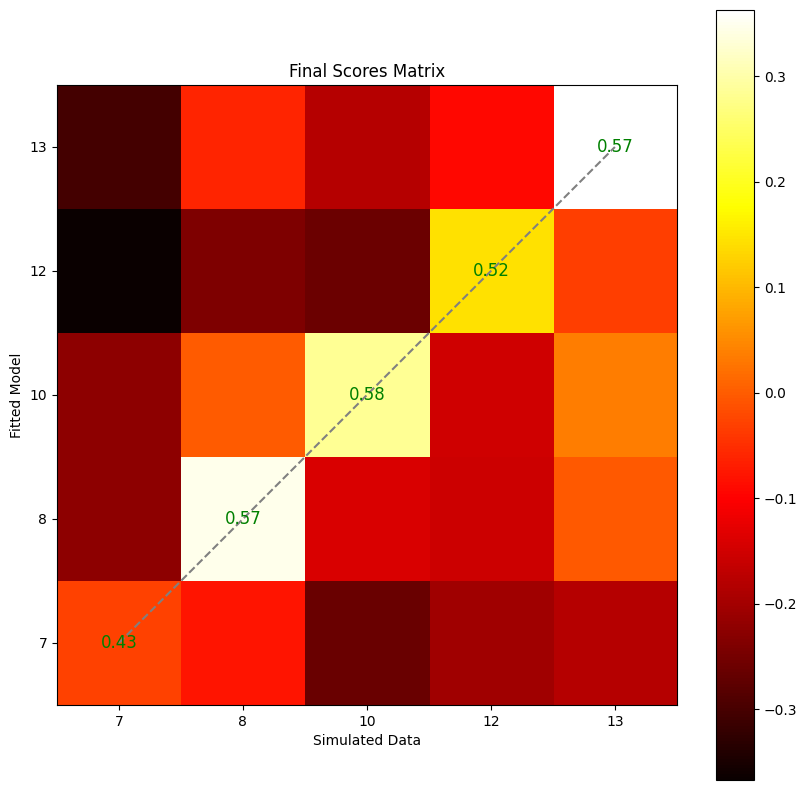

In [26]:
MemData1.GaussianHMMPipeline(5, components, simulation_type=96, subject=45, evaluation=['lda','bic'], n_iter=100, iteration=5, only_bic=True, models=model_list, Summary=False)

## Tolerance fix

We can see that using the defualt tolerance of 20 we have some problems with one hidden layer that is collocated outside the image, we can fix this by setting a lower tolerance.

Reference: _hmm.py 
    
    ```
        def  DataArrayHmm(self,stim,group=-1,tolerance=20,verb=True):
        ...
    ```

In [27]:
components = list(range(2, 16))
components

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

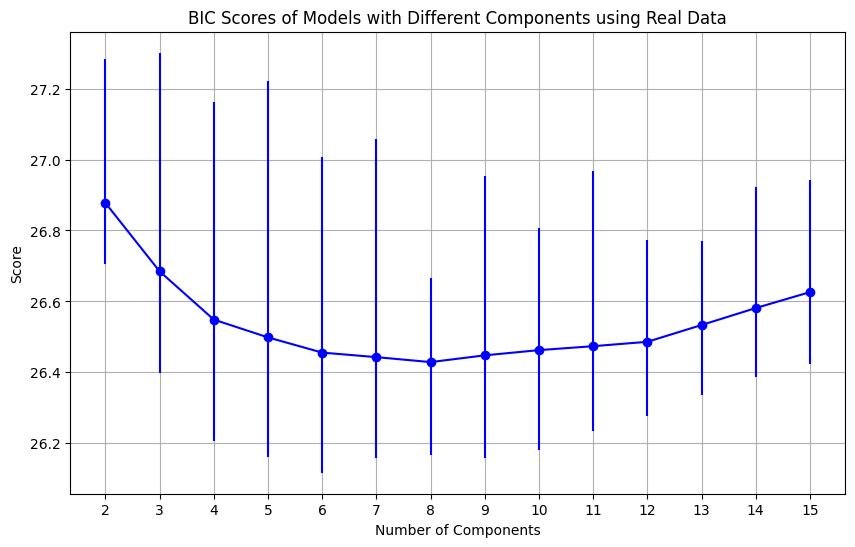

resolution x = 1280  y = 960
   Stimulus Best Model (Min BIC) Best Model (Mean + Standard Deviation)  \
0         5      [6, 9, 7, 5, 8]                     [8, 12, 10, 9, 11]   

    Entropy  
0  5.152962  


In [30]:
results_full = MemData.GaussianHMMPipeline(5, components, tollerance=0, starting_tests=200, only_starting=True, only_bic=True, only_best=True, threshold=0.4)

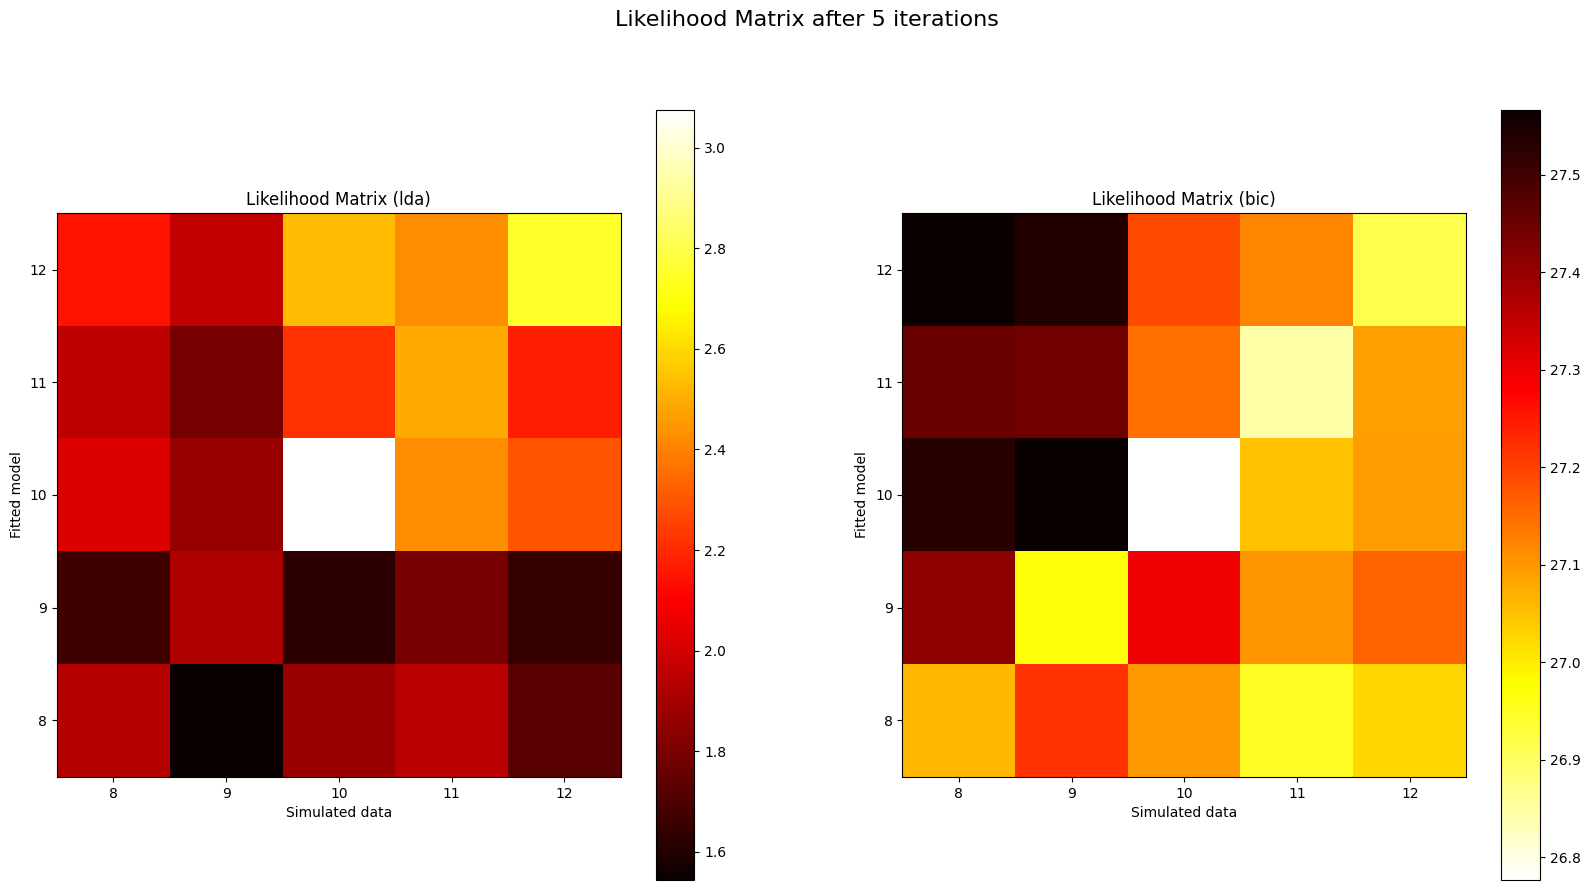

resolution x = 1280  y = 960


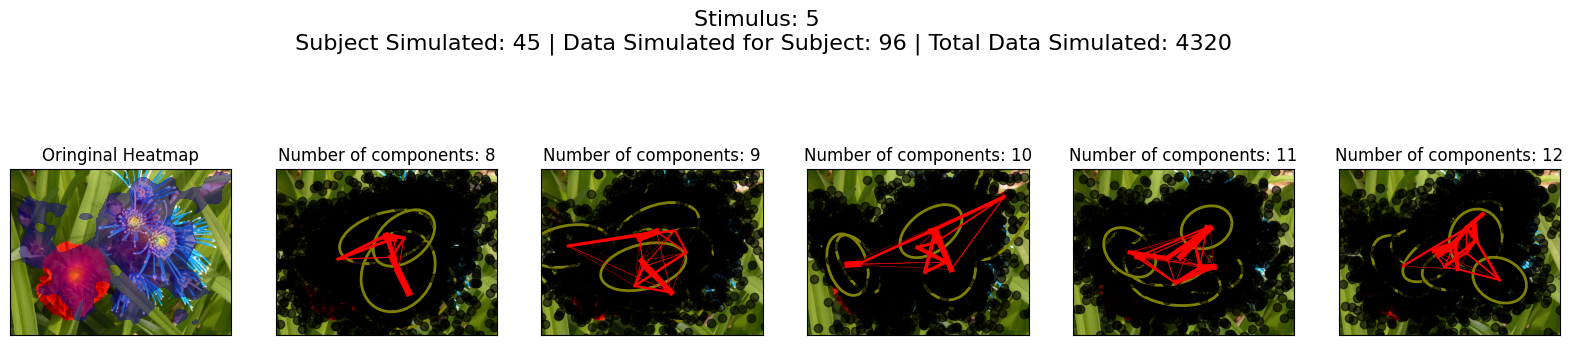

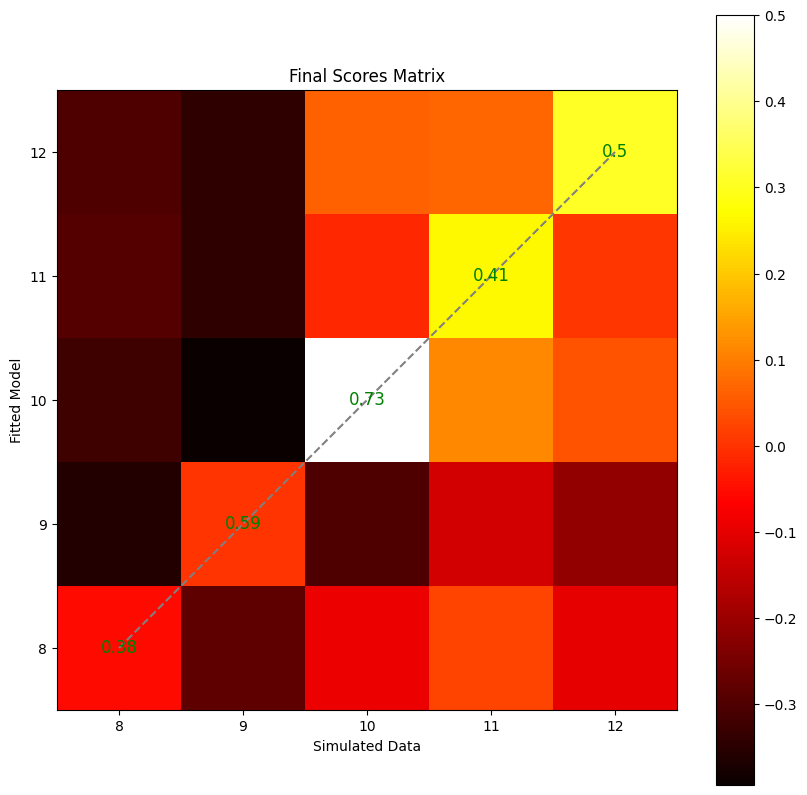

In [31]:
model_list = results_full[0]
MemData.GaussianHMMPipeline(5, components, tollerance=0, simulation_type='max', evaluation=['lda','bic'], n_iter=100, iteration=5, only_bic=True, models=model_list, Summary=False)

Fixing the tollerance is possible to see that, for both the dataset, the hidden layer is now inside the image.

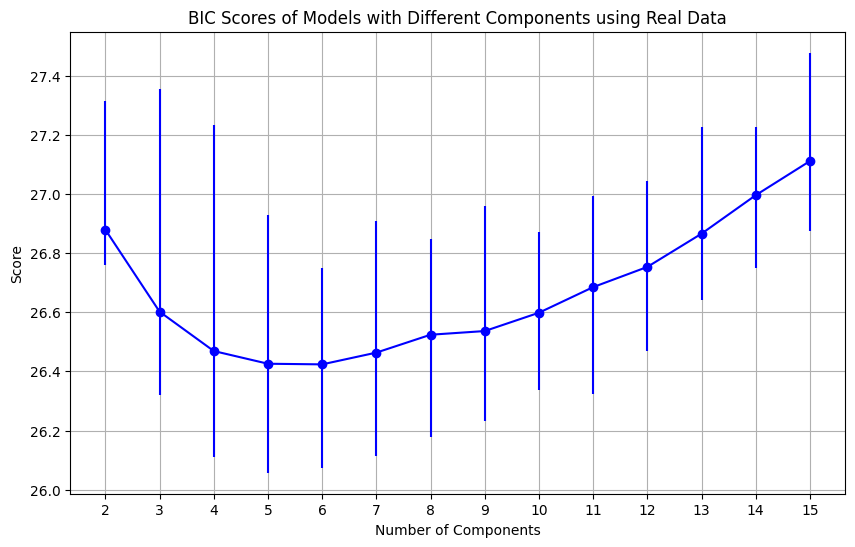

resolution x = 1280  y = 960
   Stimulus Best Model (Min BIC) Best Model (Mean + Standard Deviation)  \
0         5      [5, 6, 4, 7, 8]                       [6, 5, 7, 9, 10]   

   Entropy  
0  4.93274  


In [34]:
results = MemData1.GaussianHMMPipeline(5, components, tollerance=0, starting_tests=100, only_starting=True, only_bic=True, only_best=True, threshold=0.4)

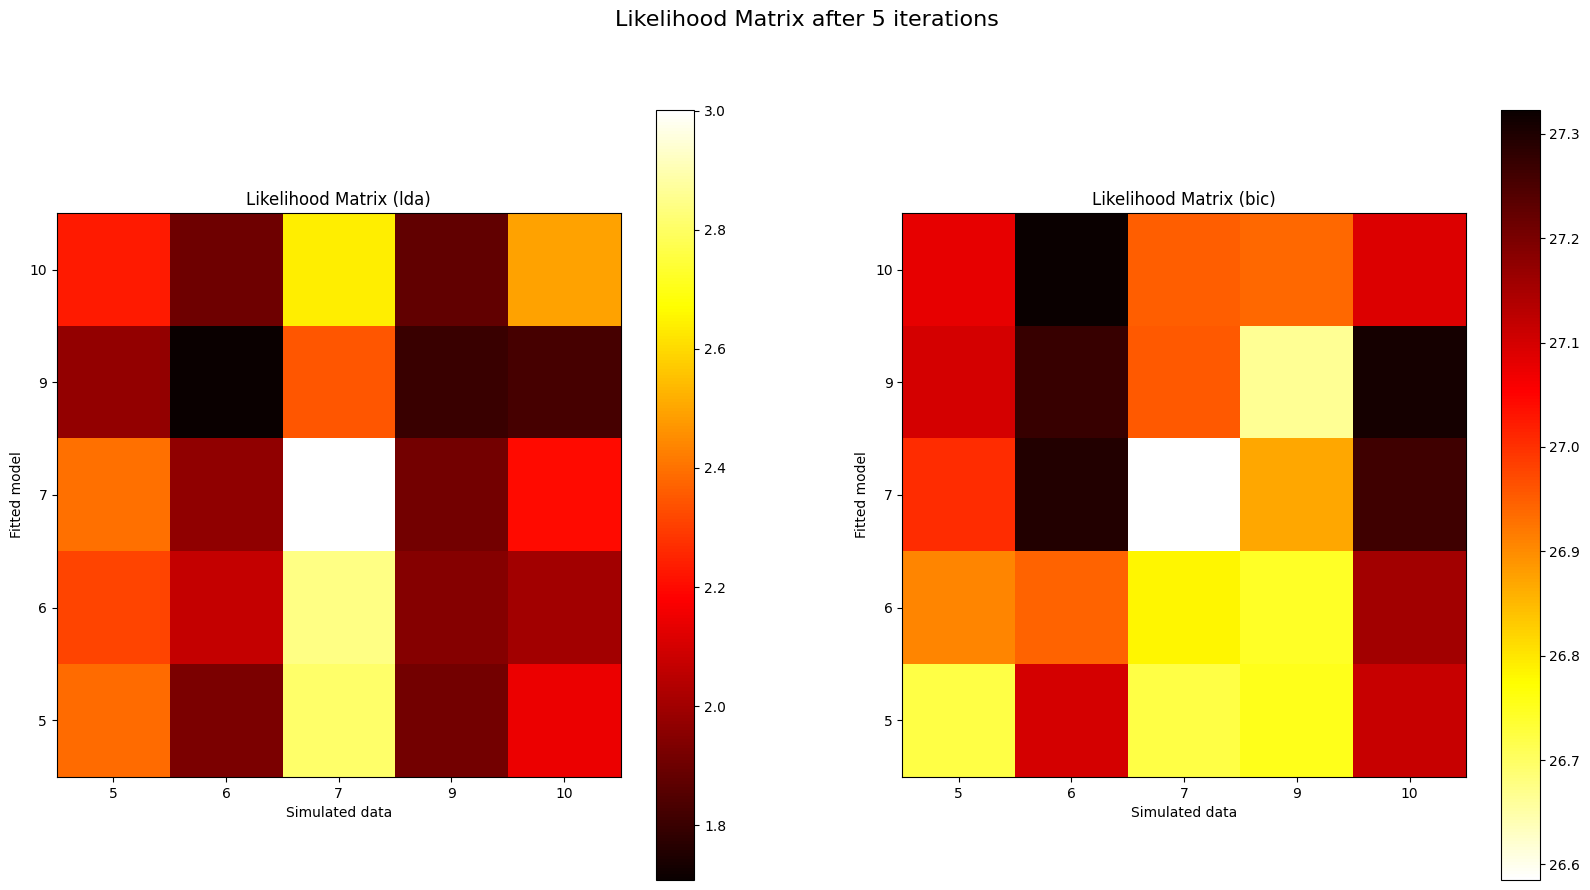

resolution x = 1280  y = 960


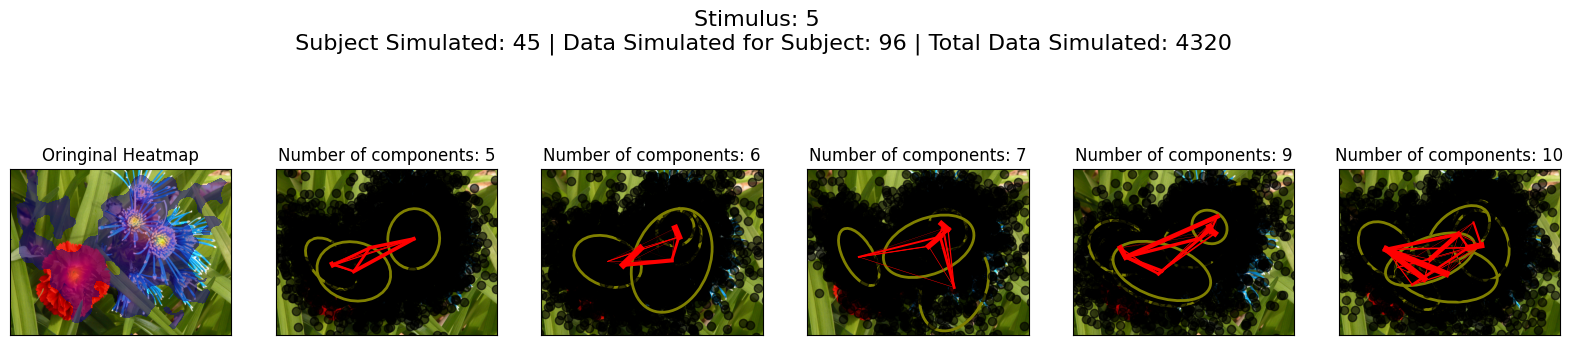

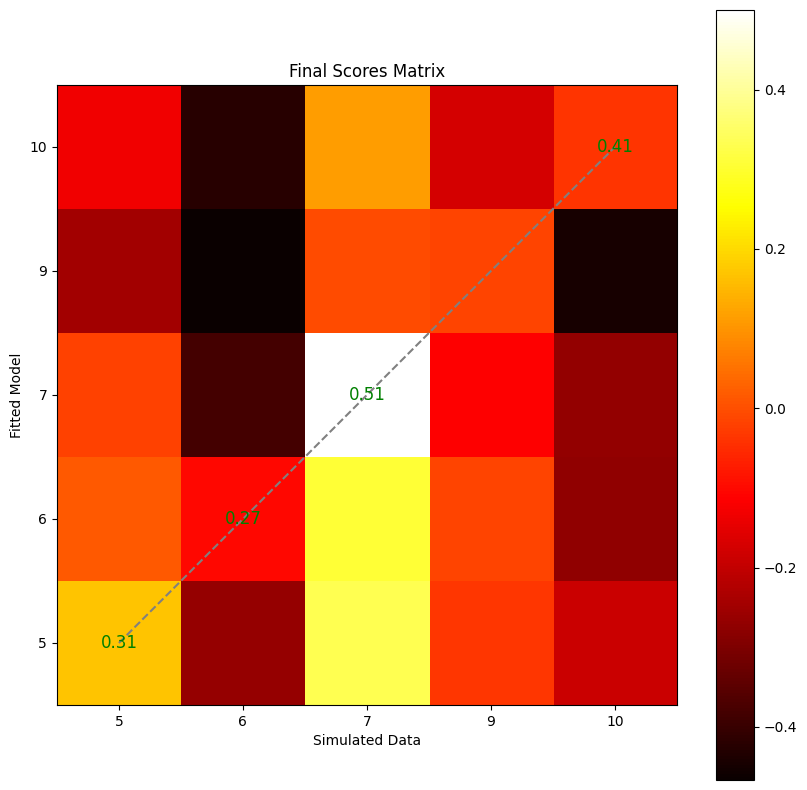

In [36]:
model_list = results[0]
MemData1.GaussianHMMPipeline(5, components, tollerance=0, simulation_type=96, subject=45, evaluation=['lda','bic'], iteration=5, only_bic=True, models=model_list, Summary=False)

## Results

The results show that the final matrix is quite similar to the one obtained using the full dataset, de difference primarily comes from the starting test, were we can see that the two dataset have different components.

Then the final matrix shows how for the complete dataset the best result is quite clear, with the anti-diagonal of 10 components with the highest values, while for the reduced dataset the matrix is not that clear (probably due to the amount of data generated) but is possible to observe that the again the model with 10 components obtain very good results (actually the second best) and also comparing the column of the best model (7 componets) with the one with 10 components we can see that actually the 10 components model is better.

In conclusion we can say that the result respect the expectation, we dont obtain a perfect match probably due to pattern that are not present in the reduced dataset, but the result are at least compareble and consistent.